In [1]:
import pickle

import altair as alt

import pandas as pd

import polyclonal

import yaml

In [2]:
import dms_variants
import dms_variants.codonvarianttable
from dms_variants.constants import CBPALETTE
import dms_variants.plotnine_themes

from plotnine import *

_ = theme_set(dms_variants.plotnine_themes.theme_graygrid())


In [3]:
import os
os.chdir('../../')

In [4]:
prob_escape_libA_csv = "results/prob_escape/libA_221108_1_1C04-5G04_1_prob_escape.csv"

prob_escape_libA = pd.read_csv(
    prob_escape_libA_csv, keep_default_na=False, na_values="nan"
).query("`no-antibody_count` >= no_antibody_count_threshold")
assert prob_escape_libA.notnull().all().all()

In [5]:
prob_escape_libB_csv = "results/prob_escape/libB_221108_1_1C04-5G04_1_prob_escape.csv"

prob_escape_libB = pd.read_csv(
    prob_escape_libB_csv, keep_default_na=False, na_values="nan"
).query("`no-antibody_count` >= no_antibody_count_threshold")
assert prob_escape_libB.notnull().all().all()

In [6]:
import re
pat = r'[A-Z]10[0|1|2][A-Z]'

In [7]:
libB_1c04 = prob_escape_libB[prob_escape_libB.aa_substitutions_sequential.str.contains(pat)]
libB_1c04 = libB_1c04.loc[libB_1c04['prob_escape'] != 0.0000]
libB_1c04.sort_values('prob_escape', ascending=False)

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration
430528,libB,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,K101T K190Q G219P,3,GCCAACATAAAAGCTT,1.0000,1.3969,97,15,16152,3489,9397483,15,K82T K171Q G200P,1C04-5G04,1.37
430875,libB,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,K101V I255M,2,TGGTAATAGGAGTGGG,1.0000,1.0118,89,19,16152,3489,9397483,15,K82V I236M,1C04-5G04,1.37
428922,libB,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,N27S E69V K102E P122S K469N,5,CTACGAAAATTTTTCA,1.0000,1.4826,151,22,16152,3489,9397483,15,N8S E50V K83E P103S K450N,1C04-5G04,1.37
428841,libB,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,K101T S212F,2,TTATAGCCTTGTGTTG,1.0000,1.2401,155,27,16152,3489,9397483,15,K82T S193F,1C04-5G04,1.37
341347,libB,221108_1_antibody_1C04-5G04_2.05_1,221108_1_no-antibody_control_1,K101T R280T,2,AATAATCAAACACGGC,1.0000,1.0121,908,35,89435,3489,9397483,15,K82T R261T,1C04-5G04,2.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122838,libB,221108_1_antibody_1C04-5G04_6.93_1,221108_1_no-antibody_control_1,K101A A182F R241F T347D,4,TGAGAGTGAACCCACA,0.0001,0.0001,1,67,639349,3489,9397483,15,K82A A163F R222F T328D,1C04-5G04,6.93
119876,libB,221108_1_antibody_1C04-5G04_6.93_1,221108_1_no-antibody_control_1,K46H N82D N100D G205S N401G,5,ATTGAGCCAAAAATGG,0.0001,0.0001,1,37,639349,3489,9397483,15,K27H N63D N81D G186S N382G,1C04-5G04,6.93
37781,libB,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,N82K K101A K190* I233T R241W R326S G498T,7,CGAGTAATCGTACCGC,0.0001,0.0001,1,46,984817,3489,9397483,15,N63K K82A K171* I214T R222W R307S G479T,1C04-5G04,10.40
36254,libB,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,N100G A182Y I286V,3,GCTAGAATCACAAGTA,0.0001,0.0001,1,27,984817,3489,9397483,15,N81G A163Y I267V,1C04-5G04,10.40


In [19]:
pat_both = r'[A-Z]227[A-Z]'

libB_both = libB_1c04[libB_1c04.aa_substitutions_sequential.str.contains(pat_both)]
libB_both = libB_both.loc[libB_both['prob_escape'] != 0.0000]
libB_both.sort_values('prob_escape', ascending=False)

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration
340932,libB,221108_1_antibody_1C04-5G04_2.05_1,221108_1_no-antibody_control_1,S66T K101A Y178G I211A R227I,5,CTTGTCATAGGATAAA,0.2141,0.2141,1487,271,89435,3489,9397483,15,S47T K82A Y159G I192A R208I,1C04-5G04,2.05
428559,libB,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,S66T K101A Y178G I211A R227I,5,CTTGTCATAGGATAAA,0.1347,0.1347,169,271,16152,3489,9397483,15,S47T K82A Y159G I192A R208I,1C04-5G04,1.37
429565,libB,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,K101A R111Q A147D L176D R227A N331D,6,TTGATCTAGATGGAGG,0.1274,0.1274,125,212,16152,3489,9397483,15,K82A R92Q A128D L157D R208A N312D,1C04-5G04,1.37
343959,libB,221108_1_antibody_1C04-5G04_2.05_1,221108_1_no-antibody_control_1,E69T K102H Y178C R227F,4,ACTAACGGGGAATACT,0.1046,0.1046,177,66,89435,3489,9397483,15,E50T K83H Y159C R208F,1C04-5G04,2.05
345161,libB,221108_1_antibody_1C04-5G04_2.05_1,221108_1_no-antibody_control_1,K102R R227G,2,TCGCAAATCCAGCACG,0.1025,0.1025,92,35,89435,3489,9397483,15,K83R R208G,1C04-5G04,2.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288511,libB,221108_1_antibody_1C04-5G04_3.08_1,221108_1_no-antibody_control_1,D96E K102Q R227G,3,AAATTTCCGAATAAAG,0.0003,0.0003,1,32,358314,3489,9397483,15,D77E K83Q R208G,1C04-5G04,3.08
1748,libB,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,K102N K140F S212* S217I R227D S298E Q330V Y489N,8,AACTTTGCAAAATACA,0.0003,0.0003,193,2458,984817,3489,9397483,15,K83N K121F S193* S198I R208D S279E Q311V Y470N,1C04-5G04,10.40
87394,libB,221108_1_antibody_1C04-5G04_6.93_1,221108_1_no-antibody_control_1,K102N K140F S212* S217I R227D S298E Q330V Y489N,8,AACTTTGCAAAATACA,0.0002,0.0002,111,2458,639349,3489,9397483,15,K83N K121F S193* S198I R208D S279E Q311V Y470N,1C04-5G04,6.93
37134,libB,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,K102A R227K S238L I393E,4,ACTGATTCCCGTAGCG,0.0001,0.0001,1,37,984817,3489,9397483,15,K83A R208K S219L I374E,1C04-5G04,10.40


In [8]:
libA_1c04 = prob_escape_libA[prob_escape_libA.aa_substitutions_sequential.str.contains(pat)]
libA_1c04 = libA_1c04.loc[libA_1c04['prob_escape'] != 0.0000]
libA_1c04.sort_values('prob_escape', ascending=False)

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration
333224,libA,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,A88I K102N,2,TGTTATTTGTAGCCCA,1.0000,8.0918,2070,23,68369,6147,10886757,15,A69I K83N,1C04-5G04,1.37
334053,libA,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,K102T S143E Q192N R326F Q375D,5,GGATGGAACCGAGACA,1.0000,1.0536,750,64,68369,6147,10886757,15,K83T S124E Q173N R307F Q356D,1C04-5G04,1.37
199754,libA,221108_1_antibody_1C04-5G04_3.08_1,221108_1_no-antibody_control_1,K101V T150K D207N Y321F,4,CCACCGTTATATATAA,1.0000,3.8809,13106,29,715813,6147,10886757,15,K82V T131K D188N Y302F,1C04-5G04,3.08
335321,libA,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,K101T,1,CAAATAGAATTTAGCA,1.0000,1.2487,375,27,68369,6147,10886757,15,K82T,1C04-5G04,1.37
335308,libA,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,K101R S281M K345S I393M,4,ATGTAGTTCCCTAACA,1.0000,1.1688,377,29,68369,6147,10886757,15,K82R S262M K326S I374M,1C04-5G04,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231235,libA,221108_1_antibody_1C04-5G04_3.08_1,221108_1_no-antibody_control_1,P23E P93H K102H I211L G294H P343R L439I,7,CTTATAAACACGTAAC,0.0001,0.0001,1,82,715813,6147,10886757,15,P4E P74H K83H I192L G275H P324R L420I,1C04-5G04,3.08
97210,libA,221108_1_antibody_1C04-5G04_6.93_1,221108_1_no-antibody_control_1,K101S Y321F,2,AGATACTATAACGTCG,0.0001,0.0001,2,107,1124297,6147,10886757,15,K82S Y302F,1C04-5G04,6.93
226736,libA,221108_1_antibody_1C04-5G04_3.08_1,221108_1_no-antibody_control_1,K102T S126N A147R T470V Q520K,5,ATTGCTACGCCGTGGT,0.0001,0.0001,3,236,715813,6147,10886757,15,K83T S107N A128R T451V Q501K,1C04-5G04,3.08
99289,libA,221108_1_antibody_1C04-5G04_6.93_1,221108_1_no-antibody_control_1,N27D K102H P234S I307M T347M E363D Q413H,7,CGCCCAAGCGCTGTCT,0.0001,0.0001,1,45,1124297,6147,10886757,15,N8D K83H P215S I288M T328M E344D Q394H,1C04-5G04,6.93


In [17]:
pat_both = r'[A-Z]227[A-Z]'

libA_both = libA_1c04[libA_1c04.aa_substitutions_sequential.str.contains(pat_both)]
libA_both.sort_values('prob_escape', ascending=False)

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration
266969,libA,221108_1_antibody_1C04-5G04_2.05_1,221108_1_no-antibody_control_1,K102T R227H,2,GTGAACTGCCATATTG,0.1997,0.1997,1603,166,297196,6147,10886757,15,K83T R208H,1C04-5G04,2.05
335838,libA,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,K102T R227H,2,GTGAACTGCCATATTG,0.1619,0.1619,299,166,68369,6147,10886757,15,K83T R208H,1C04-5G04,1.37
332965,libA,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,K101A R227F M365F A495E,4,AATCCTCAGTATATTA,0.1321,0.1321,7245,4932,68369,6147,10886757,15,K82A R208F M346F A476E,1C04-5G04,1.37
333751,libA,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,K102R R227L G352S,3,GTGCAAACGGAAAGTT,0.1214,0.1214,983,728,68369,6147,10886757,15,K83R R208L G333S,1C04-5G04,1.37
266945,libA,221108_1_antibody_1C04-5G04_2.05_1,221108_1_no-antibody_control_1,K102C Y113K R227Y S298E V366A K491A,6,AAGTATGGTAGACAGT,0.0754,0.0754,1666,457,297196,6147,10886757,15,K83C Y94K R208Y S279E V347A K472A,1C04-5G04,2.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116590,libA,221108_1_antibody_1C04-5G04_6.93_1,221108_1_no-antibody_control_1,S73Y K102R Y178N T179S S218W R227N I319H K387I...,10,CGATAGGTACCTAATG,0.0000,0.0000,0,15,1124297,6147,10886757,15,S54Y K83R Y159N T160S S199W R208N I300H K368I ...,1C04-5G04,6.93
177668,libA,221108_1_antibody_1C04-5G04_4.62_1,221108_1_no-antibody_control_1,K102D R227G K406N,3,ATGGACGATCCAATCT,0.0000,0.0000,0,30,746861,6147,10886757,15,K83D R208G K387N,1C04-5G04,4.62
249270,libA,221108_1_antibody_1C04-5G04_3.08_1,221108_1_no-antibody_control_1,S73Y K102R Y178N T179S S218W R227N I319H K387I...,10,CGATAGGTACCTAATG,0.0000,0.0000,0,15,715813,6147,10886757,15,S54Y K83R Y159N T160S S199W R208N I300H K368I ...,1C04-5G04,3.08
238209,libA,221108_1_antibody_1C04-5G04_3.08_1,221108_1_no-antibody_control_1,K101V G161Y R227L K257Q R280I N401A,6,ACAATTTTCAATAACA,0.0000,0.0000,0,21,715813,6147,10886757,15,K82V G142Y R208L K238Q R261I N382A,1C04-5G04,3.08


In [18]:
libA_both = libA_both.loc[libA_both['prob_escape'] != 0.0000]
libA_both

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration
665,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,K101A R227F M365F A495E,4,AATCCTCAGTATATTA,0.0006,0.0006,411,4932,889858,6147,10886757,15,K82A R208F M346F A476E,1C04-5G04,10.40
3541,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,K102R S217P R227K S238M Q330T S377F Y489F,7,TCTGGTCAGACATTAA,0.0013,0.0013,100,540,889858,6147,10886757,15,K83R S198P R208K S219M Q311T S358F Y470F,1C04-5G04,10.40
4028,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,K102R R227L G352S,3,GTGCAAACGGAAAGTT,0.0008,0.0008,87,728,889858,6147,10886757,15,K83R R208L G333S,1C04-5G04,10.40
4611,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,A30T K102R S157L R227S,4,GCTGAGGACAATATAA,0.0015,0.0015,77,366,889858,6147,10886757,15,A11T K83R S138L R208S,1C04-5G04,10.40
6807,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,K102C Y113K R227Y S298E V366A K491A,6,AAGTATGGTAGACAGT,0.0008,0.0008,50,457,889858,6147,10886757,15,K83C Y94K R208Y S279E V347A K472A,1C04-5G04,10.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346508,libA,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,K102H S126G N141M R227S L450V,5,ACGTATTTGGCAAAAA,0.0010,0.0010,2,184,68369,6147,10886757,15,K83H S107G N122M R208S L431V,1C04-5G04,1.37
347553,libA,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,A30T K102R S157L R227S,4,GCTGAGGACAATATAA,0.0005,0.0005,2,366,68369,6147,10886757,15,A11T K83R S138L R208S,1C04-5G04,1.37
348326,libA,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,K101A S217R R227G I307L K345L K387E N508K,7,AAAAGAAAGCTGCTTG,0.0012,0.0012,1,73,68369,6147,10886757,15,K82A S198R R208G I288L K326L K368E N489K,1C04-5G04,1.37
349785,libA,221108_1_antibody_1C04-5G04_1.37_1,221108_1_no-antibody_control_1,K102S R227D D394T A495G,4,CAATTGTTATCCCGAA,0.0006,0.0006,1,147,68369,6147,10886757,15,K83S R208D D375T A476G,1C04-5G04,1.37


In [9]:
first_epitope_var = pd.concat([libA_1c04, libB_1c04])

/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


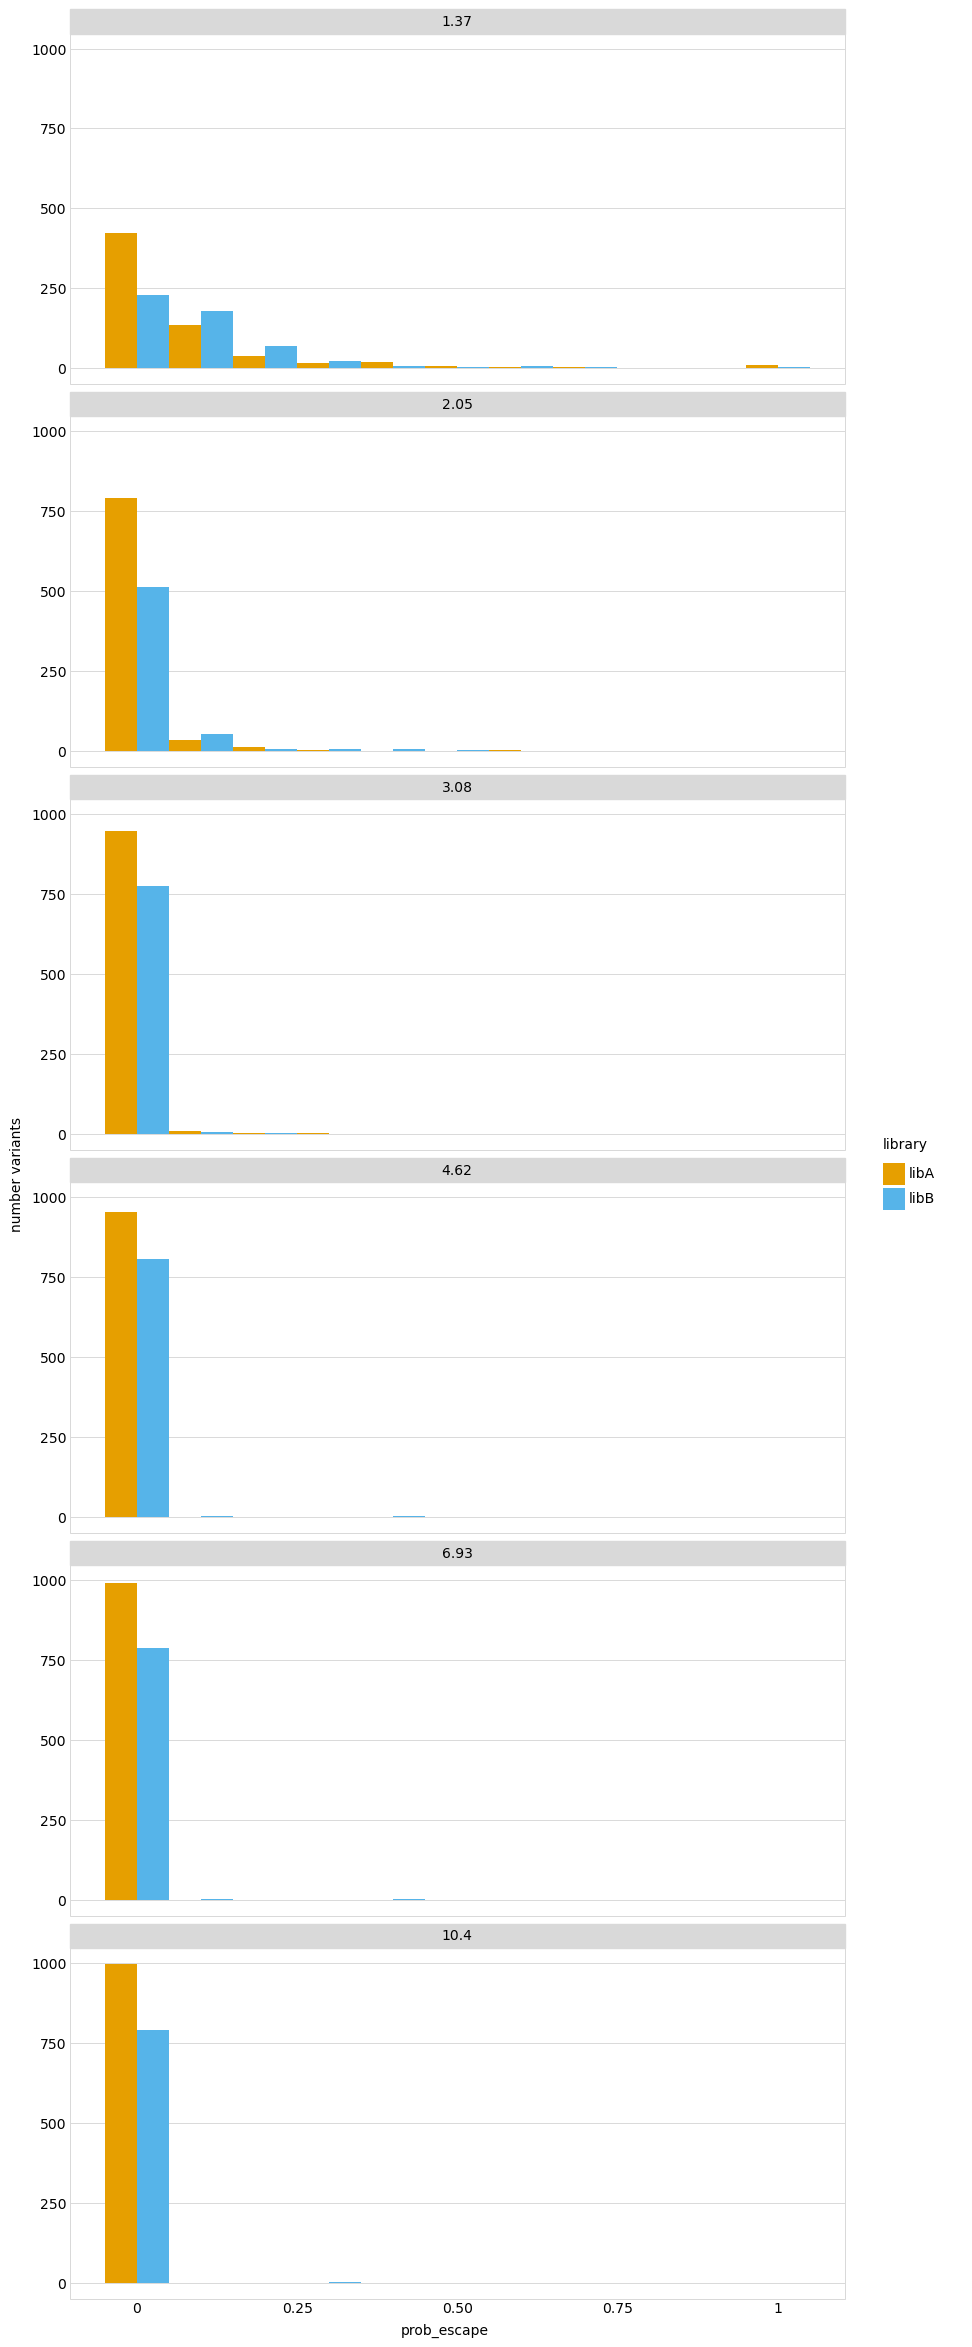

In [10]:
p = (
    ggplot(
        first_epitope_var,
        aes(x='prob_escape', fill='library')) + 
    geom_histogram(position=position_dodge(), binwidth=0.1) + 
    theme(figure_size=(10, 30),
         panel_grid_major_x=element_blank(),
         ) +
    scale_fill_manual(values=CBPALETTE[1:]) +
    labs(x='prob_escape', 
         y='number variants')
) 

# p = p + facet_wrap('~ antibody_concentration')

p = p + facet_wrap('~ antibody_concentration', nrow = 6)
_ = p.draw()

# _ = p.draw()

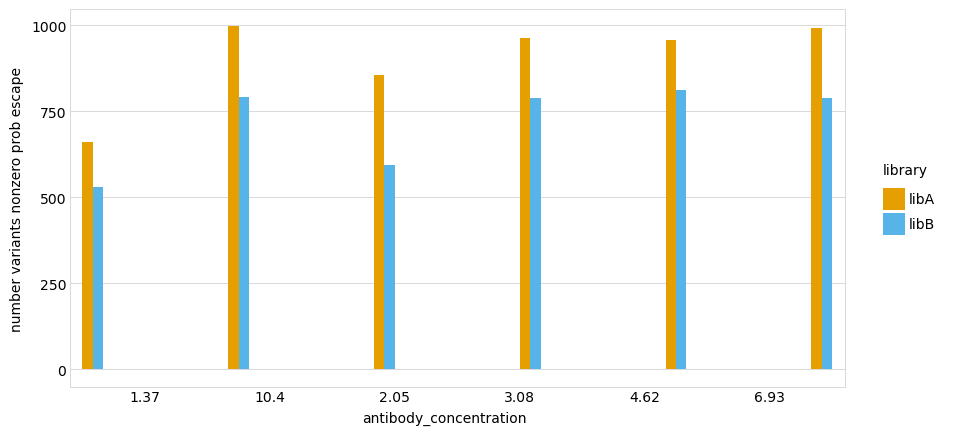

In [29]:
first_epitope_var['antibody_concentration'] = first_epitope_var['antibody_concentration'].apply(str)

p = (
    ggplot(
        first_epitope_var,
        aes(x='antibody_concentration', fill='library')) + 
    geom_histogram(position=position_dodge(), binwidth=1) + 
    theme(figure_size=(10, 5),
         panel_grid_major_x=element_blank(),
         ) +
    scale_fill_manual(values=CBPALETTE[1:]) +
    labs(x='antibody_concentration', 
         y='number variants nonzero prob escape')
) 

_ = p.draw()

In [16]:
libA_1c04_highAb = libA_1c04.loc[(libA_1c04['antibody_concentration'] != 1.37) &
                                 (libA_1c04['antibody_concentration'] != 2.05) &
                                 (libA_1c04['antibody_concentration'] != 3.08)]

# libA_1c04_highAb = libA_1c04[libA_1c04.antibody_concentration.astype(str).str.contains(low_ab_pat)]
# libB_both = libB_1c04[libB_1c04.aa_substitutions_sequential.str.contains(pat_both)]
libA_1c04_highAb

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration
104,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,K101V R111T T302S,3,GTTCTAGCTGGTGGTT,0.0013,0.0013,1443,7541,889858,6147,10886757,15,K82V R92T T283S,1C04-5G04,10.40
123,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,N100G K140M,2,ACTCCTTCCTATATGT,0.0011,0.0011,1280,7754,889858,6147,10886757,15,N81G K121M,1C04-5G04,10.40
125,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,K101A K430C,2,AAATTCGGAACCGAAT,0.0015,0.0015,1267,5812,889858,6147,10886757,15,K82A K411C,1C04-5G04,10.40
207,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,K101Q Q395E E462A,3,AACCTCAAAAACAAAG,0.0009,0.0009,875,7086,889858,6147,10886757,15,K82Q Q376E E443A,1C04-5G04,10.40
239,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,G24V K102S A182Y,3,GATTAGATGCAGCAAA,0.0014,0.0014,802,3857,889858,6147,10886757,15,G5V K83S A163Y,1C04-5G04,10.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165464,libA,221108_1_antibody_1C04-5G04_4.62_1,221108_1_no-antibody_control_1,K102D A125W S143M G161D N408S,5,TACATATACTCGATAT,0.0004,0.0004,1,19,746861,6147,10886757,15,K83D A106W S124M G142D N389S,1C04-5G04,4.62
165632,libA,221108_1_antibody_1C04-5G04_4.62_1,221108_1_no-antibody_control_1,K101R K140H Y178A T179H Q330P,5,TGATATACAAAGCCTA,0.0005,0.0005,1,16,746861,6147,10886757,15,K82R K121H Y159A T160H Q311P,1C04-5G04,4.62
165684,libA,221108_1_antibody_1C04-5G04_4.62_1,221108_1_no-antibody_control_1,T29C K102R I393S,3,TTAAGAGACAAGAAAA,0.0001,0.0001,1,71,746861,6147,10886757,15,T10C K83R I374S,1C04-5G04,4.62
165692,libA,221108_1_antibody_1C04-5G04_4.62_1,221108_1_no-antibody_control_1,K102T V366T,2,TTACCTTGACAATATT,0.0005,0.0005,1,17,746861,6147,10886757,15,K83T V347T,1C04-5G04,4.62


In [18]:
libB_1c04_highAb = libB_1c04.loc[(libB_1c04['antibody_concentration'] != 1.37) &
                                 (libB_1c04['antibody_concentration'] != 2.05) &
                                 (libB_1c04['antibody_concentration'] != 3.08)]
libB_1c04_highAb

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration
1,libB,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,Q76L K101A P246S E429M,4,GTTATATAAGCGGTAA,0.2806,0.2806,12912,163,984817,3489,9397483,15,Q57L K82A P227S E410M,1C04-5G04,10.40
51,libB,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,K101Q A182N V509Q,3,TCCTAATTTAGGATCG,0.0006,0.0006,2225,12589,984817,3489,9397483,15,K82Q A163N V490Q,1C04-5G04,10.40
54,libB,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,K102Q D460A,2,GTGGCCCTGGGTCATC,0.0005,0.0005,2013,13011,984817,3489,9397483,15,K83Q D441A,1C04-5G04,10.40
85,libB,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,K102R V366F,2,ACTCGTACAATTTCTA,0.0006,0.0006,1732,10638,984817,3489,9397483,15,K83R V347F,1C04-5G04,10.40
87,libB,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,N100D W253H,2,AGAACATGAACCATTT,0.0008,0.0008,1718,7232,984817,3489,9397483,15,N81D W234H,1C04-5G04,10.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210714,libB,221108_1_antibody_1C04-5G04_4.62_1,221108_1_no-antibody_control_1,D51H K102D T206S Q216R D244T,5,TGTAACTTAACTACTT,0.0003,0.0003,1,16,787005,3489,9397483,15,D32H K83D T187S Q197R D225T,1C04-5G04,4.62
210715,libB,221108_1_antibody_1C04-5G04_4.62_1,221108_1_no-antibody_control_1,K102C Y178A E191Q G294V S419P Y489H,6,TGTAATATAGTATATA,0.0003,0.0003,1,15,787005,3489,9397483,15,K83C Y159A E172Q G275V S400P Y470H,1C04-5G04,4.62
210757,libB,221108_1_antibody_1C04-5G04_4.62_1,221108_1_no-antibody_control_1,N100D,1,TTAATAGTAGTTGTTA,0.0003,0.0003,1,16,787005,3489,9397483,15,N81D,1C04-5G04,4.62
210855,libB,221108_1_antibody_1C04-5G04_4.62_1,221108_1_no-antibody_control_1,S28P Q63G K102T K345C,4,TTTAAGGCTGAGTGAT,0.0002,0.0002,1,20,787005,3489,9397483,15,S9P Q44G K83T K326C,1C04-5G04,4.62


In [22]:
libA_1c04_high_escape = libA_1c04_highAb.loc[libA_1c04_highAb['prob_escape'] > 0.005]
libA_1c04_high_escape

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration
4249,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,G42* K102Q K190N L400W K471R,5,TTCCCACCAGTTTAAT,0.0054,0.0054,83,106,889858,6147,10886757,15,G23* K83Q K171N L381W K452R,1C04-5G04,10.40
5184,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,K102S N464Y,2,AGAAATTGTTCTTTAA,0.0056,0.0056,68,84,889858,6147,10886757,15,K83S N445Y,1C04-5G04,10.40
6275,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,R52Q K101R S143E I261V R326K E422Q E462A,7,AGGCGGAATAAGAACA,0.0054,0.0054,55,70,889858,6147,10886757,15,R33Q K82R S124E I242V R307K E403Q E443A,1C04-5G04,10.40
6441,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,K101N R220V D394N K522N,4,TCAAGTCAGCGTTTCT,0.0054,0.0054,54,69,889858,6147,10886757,15,K82N R201V D375N K503N,1C04-5G04,10.40
6555,libA,221108_1_antibody_1C04-5G04_10.4_1,221108_1_no-antibody_control_1,K101A K190V R241I L450M,4,TAATACAAAGAAGGCT,0.0051,0.0051,53,72,889858,6147,10886757,15,K82A K171V R222I L431M,1C04-5G04,10.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150513,libA,221108_1_antibody_1C04-5G04_4.62_1,221108_1_no-antibody_control_1,K101T I211Y A323D L386W D394A,5,TTGCATAAAGTGTGCT,0.0055,0.0055,12,18,746861,6147,10886757,15,K82T I192Y A304D L367W D375A,1C04-5G04,4.62
150516,libA,221108_1_antibody_1C04-5G04_4.62_1,221108_1_no-antibody_control_1,I48M K102N K140Q L183I K329N G405D Y431M I456L,8,TTGCTGATTATAGTTA,0.0055,0.0055,12,18,746861,6147,10886757,15,I29M K83N K121Q L164I K310N G386D Y412M I437L,1C04-5G04,4.62
151339,libA,221108_1_antibody_1C04-5G04_4.62_1,221108_1_no-antibody_control_1,K102T Y113S Y178N T179K,4,TTTTCGTTTTAAACAA,0.0060,0.0060,11,15,746861,6147,10886757,15,K83T Y94S Y159N T160K,1C04-5G04,4.62
152038,libA,221108_1_antibody_1C04-5G04_4.62_1,221108_1_no-antibody_control_1,K102R G161* I211G N408T,4,GAAATGTACATGAACA,0.0055,0.0055,10,15,746861,6147,10886757,15,K83R G142* I192G N389T,1C04-5G04,4.62


In [ ]:
df[df.aa_substitutions_sequential.match(regex)]

In [3]:
prob_escape_old = pd.read_csv(
    "https://raw.githubusercontent.com/jbloomlab/polyclonal/main/notebooks/libA_220810_1_1C04-5G04_1_prob_escape.csv",
    keep_default_na=False, na_values="nan"
).query(
    "`no-antibody_count` >= no_antibody_count_threshold"
)  # filter for those with sufficient no-antibody counts
assert prob_escape_old.notnull().all().all()
prob_escape_old.head()

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration
0,libA,220810_1_antibody_1C04-5G04_3.65_1,220810_1_no-antibody_control_1,K297I,1,ATAACACAAAAAAGTA,0.0017,0.0017,78972,246344,8599550,44895,10428350,15,K278I,1C04-5G04,3.65
1,libA,220810_1_antibody_1C04-5G04_3.65_1,220810_1_no-antibody_control_1,R111S V366M R402S,3,TATCTACCTAACGAAA,0.0047,0.0047,70662,78014,8599550,44895,10428350,15,R92S V347M R383S,1C04-5G04,3.65
2,libA,220810_1_antibody_1C04-5G04_3.65_1,220810_1_no-antibody_control_1,A125M P246H I393A G398Q F411Y,5,CTTTCAATTATGAGAC,0.0370,0.0370,57908,8163,8599550,44895,10428350,15,A106M P227H I374A G379Q F392Y,1C04-5G04,3.65
3,libA,220810_1_antibody_1C04-5G04_3.65_1,220810_1_no-antibody_control_1,Y113M S143N S164N I307M I393Y E468Q,6,TGTATTAGCATTTTGA,0.0074,0.0074,37740,26593,8599550,44895,10428350,15,Y94M S124N S145N I288M I374Y E449Q,1C04-5G04,3.65
4,libA,220810_1_antibody_1C04-5G04_3.65_1,220810_1_no-antibody_control_1,G237H P246H V366M,3,CCAAGGAGCACGAAAA,0.0218,0.0218,26699,6407,8599550,44895,10428350,15,G218H P227H V347M,1C04-5G04,3.65


In [4]:
prob_escape_new_csv = "results/prob_escape/libA_221021_1_1C04-5G04_1_prob_escape.csv"

prob_escape_new = pd.read_csv(
    prob_escape_new_csv, keep_default_na=False, na_values="nan"
).query("`no-antibody_count` >= no_antibody_count_threshold")
assert prob_escape_new.notnull().all().all()

In [5]:
prob_escape_old['mut_site_sequential'] = (prob_escape_old['aa_substitutions_sequential']
                                          .str.split(' '))

In [6]:
import re

In [7]:
# .extract('(\d*\.?\d+)', expand=False)

def get_ints(list):
    ints = []
    p = re.compile('(\d*\.?\d+)')
    for item in list:
        int = p.findall(item)
#         int = re.search(r'(\d*\.?\d+)', item)
#         int = match.group(1)
        ints.append(int)
    
    ints_final = []
    for int in ints:
        for num in int:
            ints_final.append(num)
    return ints_final

prob_escape_old['mut_sites'] = prob_escape_old['mut_site_sequential'].apply(lambda x: get_ints(x))


In [8]:
prob_escape_old.head()

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration,mut_site_sequential,mut_sites
0,libA,220810_1_antibody_1C04-5G04_3.65_1,220810_1_no-antibody_control_1,K297I,1,ATAACACAAAAAAGTA,0.0017,0.0017,78972,246344,8599550,44895,10428350,15,K278I,1C04-5G04,3.65,[K297I],[297]
1,libA,220810_1_antibody_1C04-5G04_3.65_1,220810_1_no-antibody_control_1,R111S V366M R402S,3,TATCTACCTAACGAAA,0.0047,0.0047,70662,78014,8599550,44895,10428350,15,R92S V347M R383S,1C04-5G04,3.65,"[R111S, V366M, R402S]","[111, 366, 402]"
2,libA,220810_1_antibody_1C04-5G04_3.65_1,220810_1_no-antibody_control_1,A125M P246H I393A G398Q F411Y,5,CTTTCAATTATGAGAC,0.0370,0.0370,57908,8163,8599550,44895,10428350,15,A106M P227H I374A G379Q F392Y,1C04-5G04,3.65,"[A125M, P246H, I393A, G398Q, F411Y]","[125, 246, 393, 398, 411]"
3,libA,220810_1_antibody_1C04-5G04_3.65_1,220810_1_no-antibody_control_1,Y113M S143N S164N I307M I393Y E468Q,6,TGTATTAGCATTTTGA,0.0074,0.0074,37740,26593,8599550,44895,10428350,15,Y94M S124N S145N I288M I374Y E449Q,1C04-5G04,3.65,"[Y113M, S143N, S164N, I307M, I393Y, E468Q]","[113, 143, 164, 307, 393, 468]"
4,libA,220810_1_antibody_1C04-5G04_3.65_1,220810_1_no-antibody_control_1,G237H P246H V366M,3,CCAAGGAGCACGAAAA,0.0218,0.0218,26699,6407,8599550,44895,10428350,15,G218H P227H V347M,1C04-5G04,3.65,"[G237H, P246H, V366M]","[237, 246, 366]"


In [9]:
prob_escape_new['mut_site_sequential'] = (prob_escape_new['aa_substitutions_sequential']
                                          .str.split(' '))

prob_escape_new['mut_sites'] = prob_escape_new['mut_site_sequential'].apply(lambda x: get_ints(x))
prob_escape_new.head()

,library,antibody_sample,no-antibody_sample,aa_substitutions_sequential,n_aa_substitutions,barcode,prob_escape,prob_escape_uncensored,antibody_count,no-antibody_count,antibody_neut_standard_count,no-antibody_neut_standard_count,total_no_antibody_count,no_antibody_count_threshold,aa_substitutions_reference,antibody,antibody_concentration,mut_site_sequential,mut_sites
0,libA,221021_1_antibody_1C04-5G04_24.8_1,221021_1_no-antibody_control_1,K297I,1,ATAACACAAAAAAGTA,0.0006,0.0006,5128,457921,554891,28860,16889978,15,K278I,1C04-5G04,24.8,[K297I],[297]
1,libA,221021_1_antibody_1C04-5G04_24.8_1,221021_1_no-antibody_control_1,K46A I301V E409M,3,AAAAATCTGAGACAAA,0.0007,0.0007,1675,121367,554891,28860,16889978,15,K27A I282V E390M,1C04-5G04,24.8,"[K46A, I301V, E409M]","[46, 301, 409]"
2,libA,221021_1_antibody_1C04-5G04_24.8_1,221021_1_no-antibody_control_1,R111S V366M R402S,3,TATCTACCTAACGAAA,0.0006,0.0006,1653,135465,554891,28860,16889978,15,R92S V347M R383S,1C04-5G04,24.8,"[R111S, V366M, R402S]","[111, 366, 402]"
3,libA,221021_1_antibody_1C04-5G04_24.8_1,221021_1_no-antibody_control_1,L89I L263H Q520R,3,CTCTTTAAAATCCATT,0.0010,0.0010,1545,79962,554891,28860,16889978,15,L70I L244H Q501R,1C04-5G04,24.8,"[L89I, L263H, Q520R]","[89, 263, 520]"
4,libA,221021_1_antibody_1C04-5G04_24.8_1,221021_1_no-antibody_control_1,I22A H75I P246G,3,CCTCAAACATGTTACC,0.2924,0.2924,1473,262,554891,28860,16889978,15,I3A H56I P227G,1C04-5G04,24.8,"[I22A, H75I, P246G]","[22, 75, 246]"
